# Prototype NLP tasks | Task 3

In [60]:
#######################################################################
## Prototype NLP Tasks
## Created by:  Coenraad F. Mulder
## Date:        03-12-2021
## Purpose:     Prototype NLP tasks to: 
##              - create a clean corpus
##              - extract key topics from cleaned corpus
##              - perform sentiment analysis on the cleaned corpus
#######################################################################
# Libraries
#######################################################################
import pandas as pd                         # DataFrame functionality
from datetime import datetime, timedelta    # Date and time manipulation
import nltk                                 # NLP toolkit
import gensim                               # Dictionary and Corpus
import gensim.corpora as corpora            # Corpus
import ast                                  # String to list conversion
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import contractions                         # Replace contractions in text
import re                                   # Convert regular expressions
from pprint import pprint                   # Pretty print

In [43]:
########################################################################
# Import Tweets from web scrape - expecting 'tweets.xlsx' in current dir
########################################################################
tweets_df = pd.read_excel("tweets.xlsx")
tweets_df.head()

,Date,Tweet Id,Tweet Text,Username,Tweet Length,words
0,2021-12-04,1467282552117501952,WHO says no deaths reported from Omicron yet a...,HappinessPatrol,145,"['say', 'death', 'reported', 'yet', 'covid', '..."
1,2021-12-04,1467282552075529984,Will the Omicron Travel Restrictions Work? - T...,ZZsheyn,83,"['travel', 'restriction', 'work', 'new', 'york..."
2,2021-12-04,1467282547906339072,"@VaccineJo Omicron is simply a fitness test, a...",stevenjfrisch,148,"['vaccinejo', 'simply', 'fitness', 'test', 'pr..."
3,2021-12-04,1467282539433926912,@johnpavlovitz SWEET JESUS JOHN! WHY OH WHY! J...,butterflybees11,176,"['johnpavlovitz', 'sweet', 'jesus', 'john', 'o..."
4,2021-12-04,1467282530949033984,@Channel4News @krishgm I'm done humouring Fasc...,Anne_Other1,206,"['channel4news', 'krishgm', 'done', 'humouring..."


## NLP Task 1 - Topic modeling using Latent Dirichlet Allocation (LDA)

Topic modeling is the method of uncovering hidden structures in sets of texts or documents. When dealing with unlabelled data, the supervised LDA method is not effective for topic modeling, the unsupervised LDA (Un-LDA) method guarantees convergence during the iterative topic modeling process (Wang et al., 2021). The unsupervised LDA produces a probalistic representation of a document or set of documents as a mixture of topics, however, as one of the shortcomings of LDA is its inability to model sequentiallity of data, the LDA can effectively be extended with segmentation algorithms such as stochastic word alignment and integer linear programming to be more segmentally coherent (Camelin et al., 2011). The authors, Thielmann et al., have demonstrated how the combination of One-Class Support Vector Machines (SVM) and LDA can be used to effectively classify documents, presenting with greater than 80% of target data correctly classified (Thielmann et al., 2020). As the Tweeted data is unlabelled, the unsupervised LDA can be used to effectively classify the Tweets according to probalistic topics.

As can be expected from the random Tweets, each Tweet may cover more than one topic, and each topic may consist of one or more words. This is where LDA is especially effective by highlighting hidden topics within the Tweets, thus assisting to unlock the meaning of these Tweets. LDA assigns each Tweet to a mixture of topics, which allows for a more realistic clustering of the Tweets (as opposed to hard clustering by algorithms such as K-means clustering or decision trees).

LDA requires that all text be converted to a simple vector representation, and the only hyperparameter that requires tweaking is the number of topics in the LDA algorithm. For this prototype, the number of topics was set as 5 (as the keyword search already reduced the topic list to everything to do with Omicron). The preprocessing was done by the web crawler, providing a tokenized 'words' list for each Tweet. As these 'words' lists were imported from Excel, they were imported as strings (not actual lists). This is where the 'ast' Python package was handy to convert the strings to its actual list representation using the __literal_eval()__ function. To convert the tokenized text to simple vector representation, the 'gensim' package was used to convert the tokenized text into a corpus and dictionary, as required by the LDA algorithm.

The LDA prototype implementation has one major flaw, in that it does not keep the sequentiallity of the data. Refer to the output from LDA for the first 5 topics (Five topics as modelled by LDA). From this output it is evident that the words are not in a sequence that makes any sense. This is where a segmentation extension as suggested by Camelin et al. would be highly beneficial in the overall process of modeling topics. According to Thielman et al., the LDA classification method is able to classify text according to probabilistic topics with a greater than 80% average. This implementation of the LDA is unsupervised, with unlabelled data, and does therefore not have a test and training data set to calculate performance results.  

### LDA Python Implementation

#### Preprocessing of the Tokenized words

In [29]:
########################################################################
# Preprocessing
########################################################################
# Use the ast package to convert the words for each Tweet 
# to a tokenized object
data_words = []
data_words = list(tweets_df.words.apply(
    lambda x: ast.literal_eval(x)))


#### Convert the text into a Corpus and Dictionary

In [30]:
########################################################################
# Create a Corpus and Dictionary
########################################################################
# Convert the tokenized object into a Dictionary
id2word = corpora.Dictionary(data_words)

# Convert the tokenized object into a Corpus
texts = data_words

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1][0][:30])

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1)]


#### Train the LDA model

In [32]:
########################################################################
# Train the LDA model on the Tweets
########################################################################
# LDA model training

# number of topics
num_topics = 5
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)

### Five topics as modelled by LDA

In [33]:
########################################################################
# Print the keywords from the 5 topics
########################################################################
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.036*"variant" + 0.016*"case" + 0.010*"covid" + 0.009*"new" + '
  '0.006*"vaccinated" + 0.005*"mild" + 0.005*"coronavirus" + 0.005*"vaccine" + '
  '0.005*"massachusetts" + 0.005*"covid19"'),
 (1,
  '0.008*"variant" + 0.007*"still" + 0.007*"covid19" + 0.006*"vaccine" + '
  '0.005*"case" + 0.005*"new" + 0.005*"get" + 0.005*"time" + 0.005*"people" + '
  '0.005*"like"'),
 (2,
  '0.011*"variant" + 0.009*"people" + 0.007*"say" + 0.006*"uk" + 0.006*"like" '
  '+ 0.005*"news" + 0.005*"one" + 0.005*"covid" + 0.005*"via" + 0.005*"virus"'),
 (3,
  '0.014*"variant" + 0.009*"delta" + 0.007*"covid" + 0.007*"vaccine" + '
  '0.005*"one" + 0.005*"amp" + 0.005*"new" + 0.005*"people" + 0.004*"u" + '
  '0.004*"le"'),
 (4,
  '0.023*"variant" + 0.009*"delta" + 0.008*"case" + 0.006*"vaccine" + '
  '0.006*"first" + 0.006*"detected" + 0.006*"death" + 0.005*"day" + '
  '0.005*"say" + 0.004*"new"')]


---

## NLP Task 2 - Sentiment analysis using VADER

With Natural Language Processing, being able to understand the emotional tone underlying the text is a fundamental task, universally known as sentiment analysis, where the attempt is made to measure the positive or negative sentiment expressed in a message. According to Liu, textual information is classified into two main types, facts and opinions, and sentiment analysis can be used to determine the level of opinion expressions (Liu, 2010). Sentiment analysis is the process of describing whether a piece of text is positive, negative or neutral, and sentiment is defined as an attitude, thought or judgement promoted by feelings, which also forms part of the much larger study area known as Opinion Mining (Surve, 2019). According to Gaur and Sharma, sentiment analysis can be defined as a natural language process task to track the mood of the public about a particular product or topic (Gaur & Sharma, 2017). The VADER sentiment analysis engine, a simple rule-based model for general sentiment analysis, is presented as an effective engine for performing sentiment analysis on Social Media Text (Hutto & Gilbert, 2014). Gaining insight into the emotional undertone of text, and in this assignment, Tweets, create a mechanism for tracking the mood of public commentary.

As mentioned in the Overview, Twitter is all about sentiment; people Tweet what they feel and think about... When presented with a Coronavirus variant such as Omicron, these Tweets also reflect their underlying fears and reservations. This NLP Task is used to prototype that sentiment, determining the emotional tone of the Tweets associated with Omicron. As the Twitter data is unlabelled with regards to its sentiment, the pre-built sentiment analysis engine VADER, with the __SentimentIntensityAnalyzer__ method is used for this prototype, using VADER's pre-defined lists of positive and negative words to measure the sentiment (downloaded from nltk).

VADER operates on the original Tweeted text, therefore the only preprocessing required for it was removing the hyperlinks (URLS) and replacing the contractions (e.g. "You're" replaced with "You are"). The algorithm does not require any hyperparameters. Based on the results obtained by Hutto & Gilbert, it was found that VADER (with an F1 Classification Accuracy of 96%) outperforms human rators by more than 12%. Based on these results, a similar performance is expected for this sentiment analysis prototype.

The results from the Sentiment Analysis is quite surprising, where the positive tweets are much higher than the negative tweets, which would indicate a more positive emotional tone to the Tweets related to Omicron. Could it be a case where people are no longer as frightened or intimidated by Coronavirus? 

Only the future will tell...

### Sentiment Analysis Python Implementation

#### Data Preprocessing

In [44]:
########################################################################
# Preprocessing
########################################################################
def replace_contractions(text):
    """Replace contractions in string of text"""
    return contractions.fix(text)

def remove_URL(text):
    """Remove URLs from a text string"""
    return re.sub(r"http\S+", "", text)

# Remove the URLS
tweets_df["cleaned_tweets"] = tweets_df['Tweet Text'].apply(
                lambda x: remove_URL(x))

# English contractions
tweets_df["cleaned_tweets"] = tweets_df['cleaned_tweets'].apply(
                lambda x: replace_contractions(x))
    
display(tweets_df)

,Date,Tweet Id,Tweet Text,Username,Tweet Length,words,cleaned_tweets
0,2021-12-04,1467282552117501952,WHO says no deaths reported from Omicron yet a...,HappinessPatrol,145,"['say', 'death', 'reported', 'yet', 'covid', '...",WHO says no deaths reported from Omicron yet a...
1,2021-12-04,1467282552075529984,Will the Omicron Travel Restrictions Work? - T...,ZZsheyn,83,"['travel', 'restriction', 'work', 'new', 'york...",Will the Omicron Travel Restrictions Work? - T...
2,2021-12-04,1467282547906339072,"@VaccineJo Omicron is simply a fitness test, a...",stevenjfrisch,148,"['vaccinejo', 'simply', 'fitness', 'test', 'pr...","@VaccineJo Omicron is simply a fitness test, a..."
3,2021-12-04,1467282539433926912,@johnpavlovitz SWEET JESUS JOHN! WHY OH WHY! J...,butterflybees11,176,"['johnpavlovitz', 'sweet', 'jesus', 'john', 'o...",@johnpavlovitz SWEET JESUS JOHN! WHY OH WHY! J...
4,2021-12-04,1467282530949033984,@Channel4News @krishgm I'm done humouring Fasc...,Anne_Other1,206,"['channel4news', 'krishgm', 'done', 'humouring...",@Channel4News @krishgm I am done humouring Fas...
...,...,...,...,...,...,...,...
995,2021-12-04,1467274440190816000,@_evelynrae The New Zealand Government is cert...,MBoxel,192,"['_evelynrae', 'new', 'zealand', 'government',...",@_evelynrae The New Zealand Government is cert...
996,2021-12-04,1467274436034416896,"@HereComz_Woody @robeytech Yep, just got my bo...",63kk01,275,"['herecomz_woody', 'robeytech', 'yep', 'got', ...","@HereComz_Woody @robeytech Yep, just got my bo..."
997,2021-12-04,1467274435271041024,@ExeterChiefs @Saracens Chiefs beginning to ge...,theraithrover,235,"['exeterchiefs', 'saracen', 'chief', 'beginnin...",@ExeterChiefs @Saracens Chiefs beginning to ge...
998,2021-12-04,1467274433085808896,"What We Know About the New Covid Variant, Omic...",jlitwinetz,75,"['know', 'new', 'covid', 'variant']","What We Know About the New Covid Variant, Omic..."


#### Perform Sentiment Analysis

In [45]:
########################################################################
# Perform Sentiment Analysis using VADER
########################################################################
# Download the VADER lexicon, containing the positive and negative words
nltk.download('vader_lexicon')

# Set up the Sentiment Intensity Analyzer
sid = SentimentIntensityAnalyzer()

tweets_df['sentiment_intensity'] = tweets_df.apply(
    lambda row: sid.polarity_scores(row.cleaned_tweets), axis=1)
tweets_df.head()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/cmulder/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


,Date,Tweet Id,Tweet Text,Username,Tweet Length,words,cleaned_tweets,sentiment_intensity
0,2021-12-04,1467282552117501952,WHO says no deaths reported from Omicron yet a...,HappinessPatrol,145,"['say', 'death', 'reported', 'yet', 'covid', '...",WHO says no deaths reported from Omicron yet a...,"{'neg': 0.121, 'neu': 0.879, 'pos': 0.0, 'comp..."
1,2021-12-04,1467282552075529984,Will the Omicron Travel Restrictions Work? - T...,ZZsheyn,83,"['travel', 'restriction', 'work', 'new', 'york...",Will the Omicron Travel Restrictions Work? - T...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
2,2021-12-04,1467282547906339072,"@VaccineJo Omicron is simply a fitness test, a...",stevenjfrisch,148,"['vaccinejo', 'simply', 'fitness', 'test', 'pr...","@VaccineJo Omicron is simply a fitness test, a...","{'neg': 0.163, 'neu': 0.761, 'pos': 0.076, 'co..."
3,2021-12-04,1467282539433926912,@johnpavlovitz SWEET JESUS JOHN! WHY OH WHY! J...,butterflybees11,176,"['johnpavlovitz', 'sweet', 'jesus', 'john', 'o...",@johnpavlovitz SWEET JESUS JOHN! WHY OH WHY! J...,"{'neg': 0.113, 'neu': 0.701, 'pos': 0.186, 'co..."
4,2021-12-04,1467282530949033984,@Channel4News @krishgm I'm done humouring Fasc...,Anne_Other1,206,"['channel4news', 'krishgm', 'done', 'humouring...",@Channel4News @krishgm I am done humouring Fas...,"{'neg': 0.258, 'neu': 0.603, 'pos': 0.14, 'com..."


In [46]:
########################################################################
# Extract the sentiment as pos or neg
########################################################################
# We are only interested in the compound section of the Sentiment Intensity
# Extract the Compound from the Sentiments 
tweets_df['compound']  = tweets_df['sentiment_intensity'].apply(
    lambda score_dict: score_dict['compound'])

# Convert the compound to a positive/negative label
tweets_df['Sentiment'] = tweets_df['compound'].apply(
    lambda c: 'pos' if c >=0 else 'neg')

tweets_df.head()

,Date,Tweet Id,Tweet Text,Username,Tweet Length,words,cleaned_tweets,sentiment_intensity,compound,Sentiment
0,2021-12-04,1467282552117501952,WHO says no deaths reported from Omicron yet a...,HappinessPatrol,145,"['say', 'death', 'reported', 'yet', 'covid', '...",WHO says no deaths reported from Omicron yet a...,"{'neg': 0.121, 'neu': 0.879, 'pos': 0.0, 'comp...",-0.2960,neg
1,2021-12-04,1467282552075529984,Will the Omicron Travel Restrictions Work? - T...,ZZsheyn,83,"['travel', 'restriction', 'work', 'new', 'york...",Will the Omicron Travel Restrictions Work? - T...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,pos
2,2021-12-04,1467282547906339072,"@VaccineJo Omicron is simply a fitness test, a...",stevenjfrisch,148,"['vaccinejo', 'simply', 'fitness', 'test', 'pr...","@VaccineJo Omicron is simply a fitness test, a...","{'neg': 0.163, 'neu': 0.761, 'pos': 0.076, 'co...",-0.3400,neg
3,2021-12-04,1467282539433926912,@johnpavlovitz SWEET JESUS JOHN! WHY OH WHY! J...,butterflybees11,176,"['johnpavlovitz', 'sweet', 'jesus', 'john', 'o...",@johnpavlovitz SWEET JESUS JOHN! WHY OH WHY! J...,"{'neg': 0.113, 'neu': 0.701, 'pos': 0.186, 'co...",0.5984,pos
4,2021-12-04,1467282530949033984,@Channel4News @krishgm I'm done humouring Fasc...,Anne_Other1,206,"['channel4news', 'krishgm', 'done', 'humouring...",@Channel4News @krishgm I am done humouring Fas...,"{'neg': 0.258, 'neu': 0.603, 'pos': 0.14, 'com...",-0.6486,neg


In [47]:
# Drop the sentiment_intensity and compound columns from the dataframe
del tweets_df['sentiment_intensity']
del tweets_df['compound']

#### Visualise the results

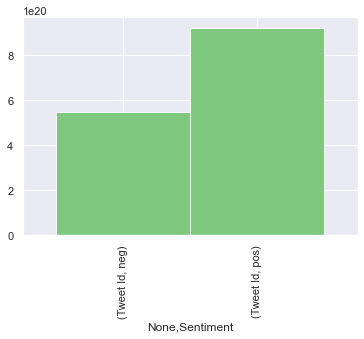

In [61]:
########################################################################
# Plot the results
########################################################################
import seaborn
import matplotlib.cm as cm
import matplotlib.pyplot as plt

seaborn.set() #make the plots look pretty
# Create a dataframe containing only the Tweet Id and Sentiment
sentiment_df = tweets_df[['Tweet Id', 'Sentiment']]

ag = sentiment_df.groupby(['Sentiment']).sum().unstack()

ag.plot(kind = 'bar', colormap = cm.Accent, width = 1)
plt.show()

---

## References

Camelin, N., Detienne, B., Huet, S., Quadri, D., & Lefevre, F. (2011). Unsupervised Concept Annotation using Latent Dirichlet Allocation and Segmental Methods. Proceedings of EMNLP 2011( Conference on Empirical Methods in Natural Language Processing), 78-81. 

Gaur, N., & Sharma, N. (2017). Sentiment Analysis in Natural Language Processing. International Journal of Engineering and Techniques, 3(3). www.ijetjournal.org 

Hutto, C. J., & Gilbert, E. (2014). VADER: A Parsimonious Rule-based Model for Sentiment Analysis of Social Media Text. Association for the Advancement of Artificial Intelligence. http://comp.social.gatech.edu/papers/icwsm14.vader.hutto.pdf 

I.V, S. (2016). Sentiment Analysis in Python using NLTK. OSFY - OpensourceForYou. 

Liu, B. (2010). Handbook of Natural Language Processing (N. I. a. F. J. Damerau, Ed. Second Edition ed.)  

Surve, N. H. (2019). Sentiment Analysis using Natural Language Processing (NLP). International Research Journal of Engineering and Technology (IRJET), 06(09). www.irjet.net 

Thielmann, A., Weisser, C., Krenz, A., & Säfken, B. (2020). Unsupervised Document Classification integrating Web Scraping, One-Class SVM and LDA Topic Modelling. 

Wang, F., Wang, Q., Nie, F., Li, Z., Yu, W., & Wang, R. (2021). Unsupervised Linear Discriminant Analysis for Jointly Clustering and Subspace Learning. IEEE Transactions on Knowledge and Data Engineering, 33, 1276-1290. https://doi.org/10.1109/TKDE.2019.2939524 

